In [3]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import imp
import pymaster as nmt
import time
%matplotlib inline

In [4]:
mask = hp.read_map('/fnx/jianyao/DataChallenge/Ali_mask_6p2_equ.fits')
mask_apo = nmt.mask_apodization(mask, 6, apotype='C2')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [10]:
nside = 1024; bin_w = 20; lmax = 1000

In [7]:
cmb_1024 = np.load('/fnx/jianyao/DataChallenge/My_simulation/CMB/cmb_maps_mc_%03d.npy'%1)
cmb_512 = hp.ud_grade(cmb_1024, nside_out=512)

In [36]:
cmb_1024_beamed = hp.smoothing((cmb_1024), fwhm = 19.0/60/180*np.pi, lmax = 1000, verbose = False)
cmb_512_beamed = hp.smoothing((cmb_512), fwhm = 19.0/60/180*np.pi, lmax = 500, verbose = False)

In [37]:
b_1024 = nmt.NmtBin(1024, nlb=bin_w, lmax=1000, is_Dell = True)
b_512 = nmt.NmtBin(512, nlb=bin_w, lmax = 500, is_Dell = True)

In [38]:
bl_h = hp.gauss_beam(19.0/60/180*np.pi, lmax = 3*1024-1)
f2_h = nmt.NmtField(mask_apo, cmb_1024_beamed[1:3]*mask, purify_e=False, purify_b=True, beam=bl_h)
cls = nmt.compute_full_master(f2_h, f2_h, b_1024)

In [39]:
cls_hp = hp.anafast(cmb_1024)

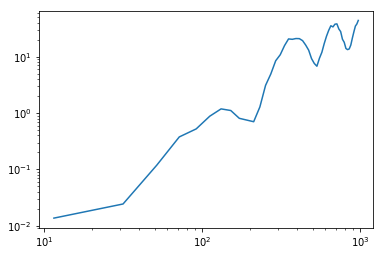

In [43]:
ells = np.arange(len(cls_hp[0]))
plt.loglog(b_1024.get_effective_ells(), cls[0])
# plt.loglog(ells, ells*(ells+1)/2/np.pi*cls_hp[1])
# plt.xlim(0, 600)